<a href="https://colab.research.google.com/github/HaendelMoreira/data_science_portifolio/blob/main/An%C3%A1lise_de_departamento_de_RH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Departamento de Recursos Humanos

É sabido que um problema que ocorre em todo tipo de empresa é o de manter talentos e lidar com os pedidos de demissão inesperados. O fato de ter que realocar o trabalho daquele funcionário pro restante da equipe pode resultar em perca de prazos e/ou qualidade no serviço, gerando transtornos que podem ser refletido no produto ou no cliente. Pensando nisto, seria possível utilizar dados para identificar quais funcionários possuem uma maior tendência a deixarem a empresa?



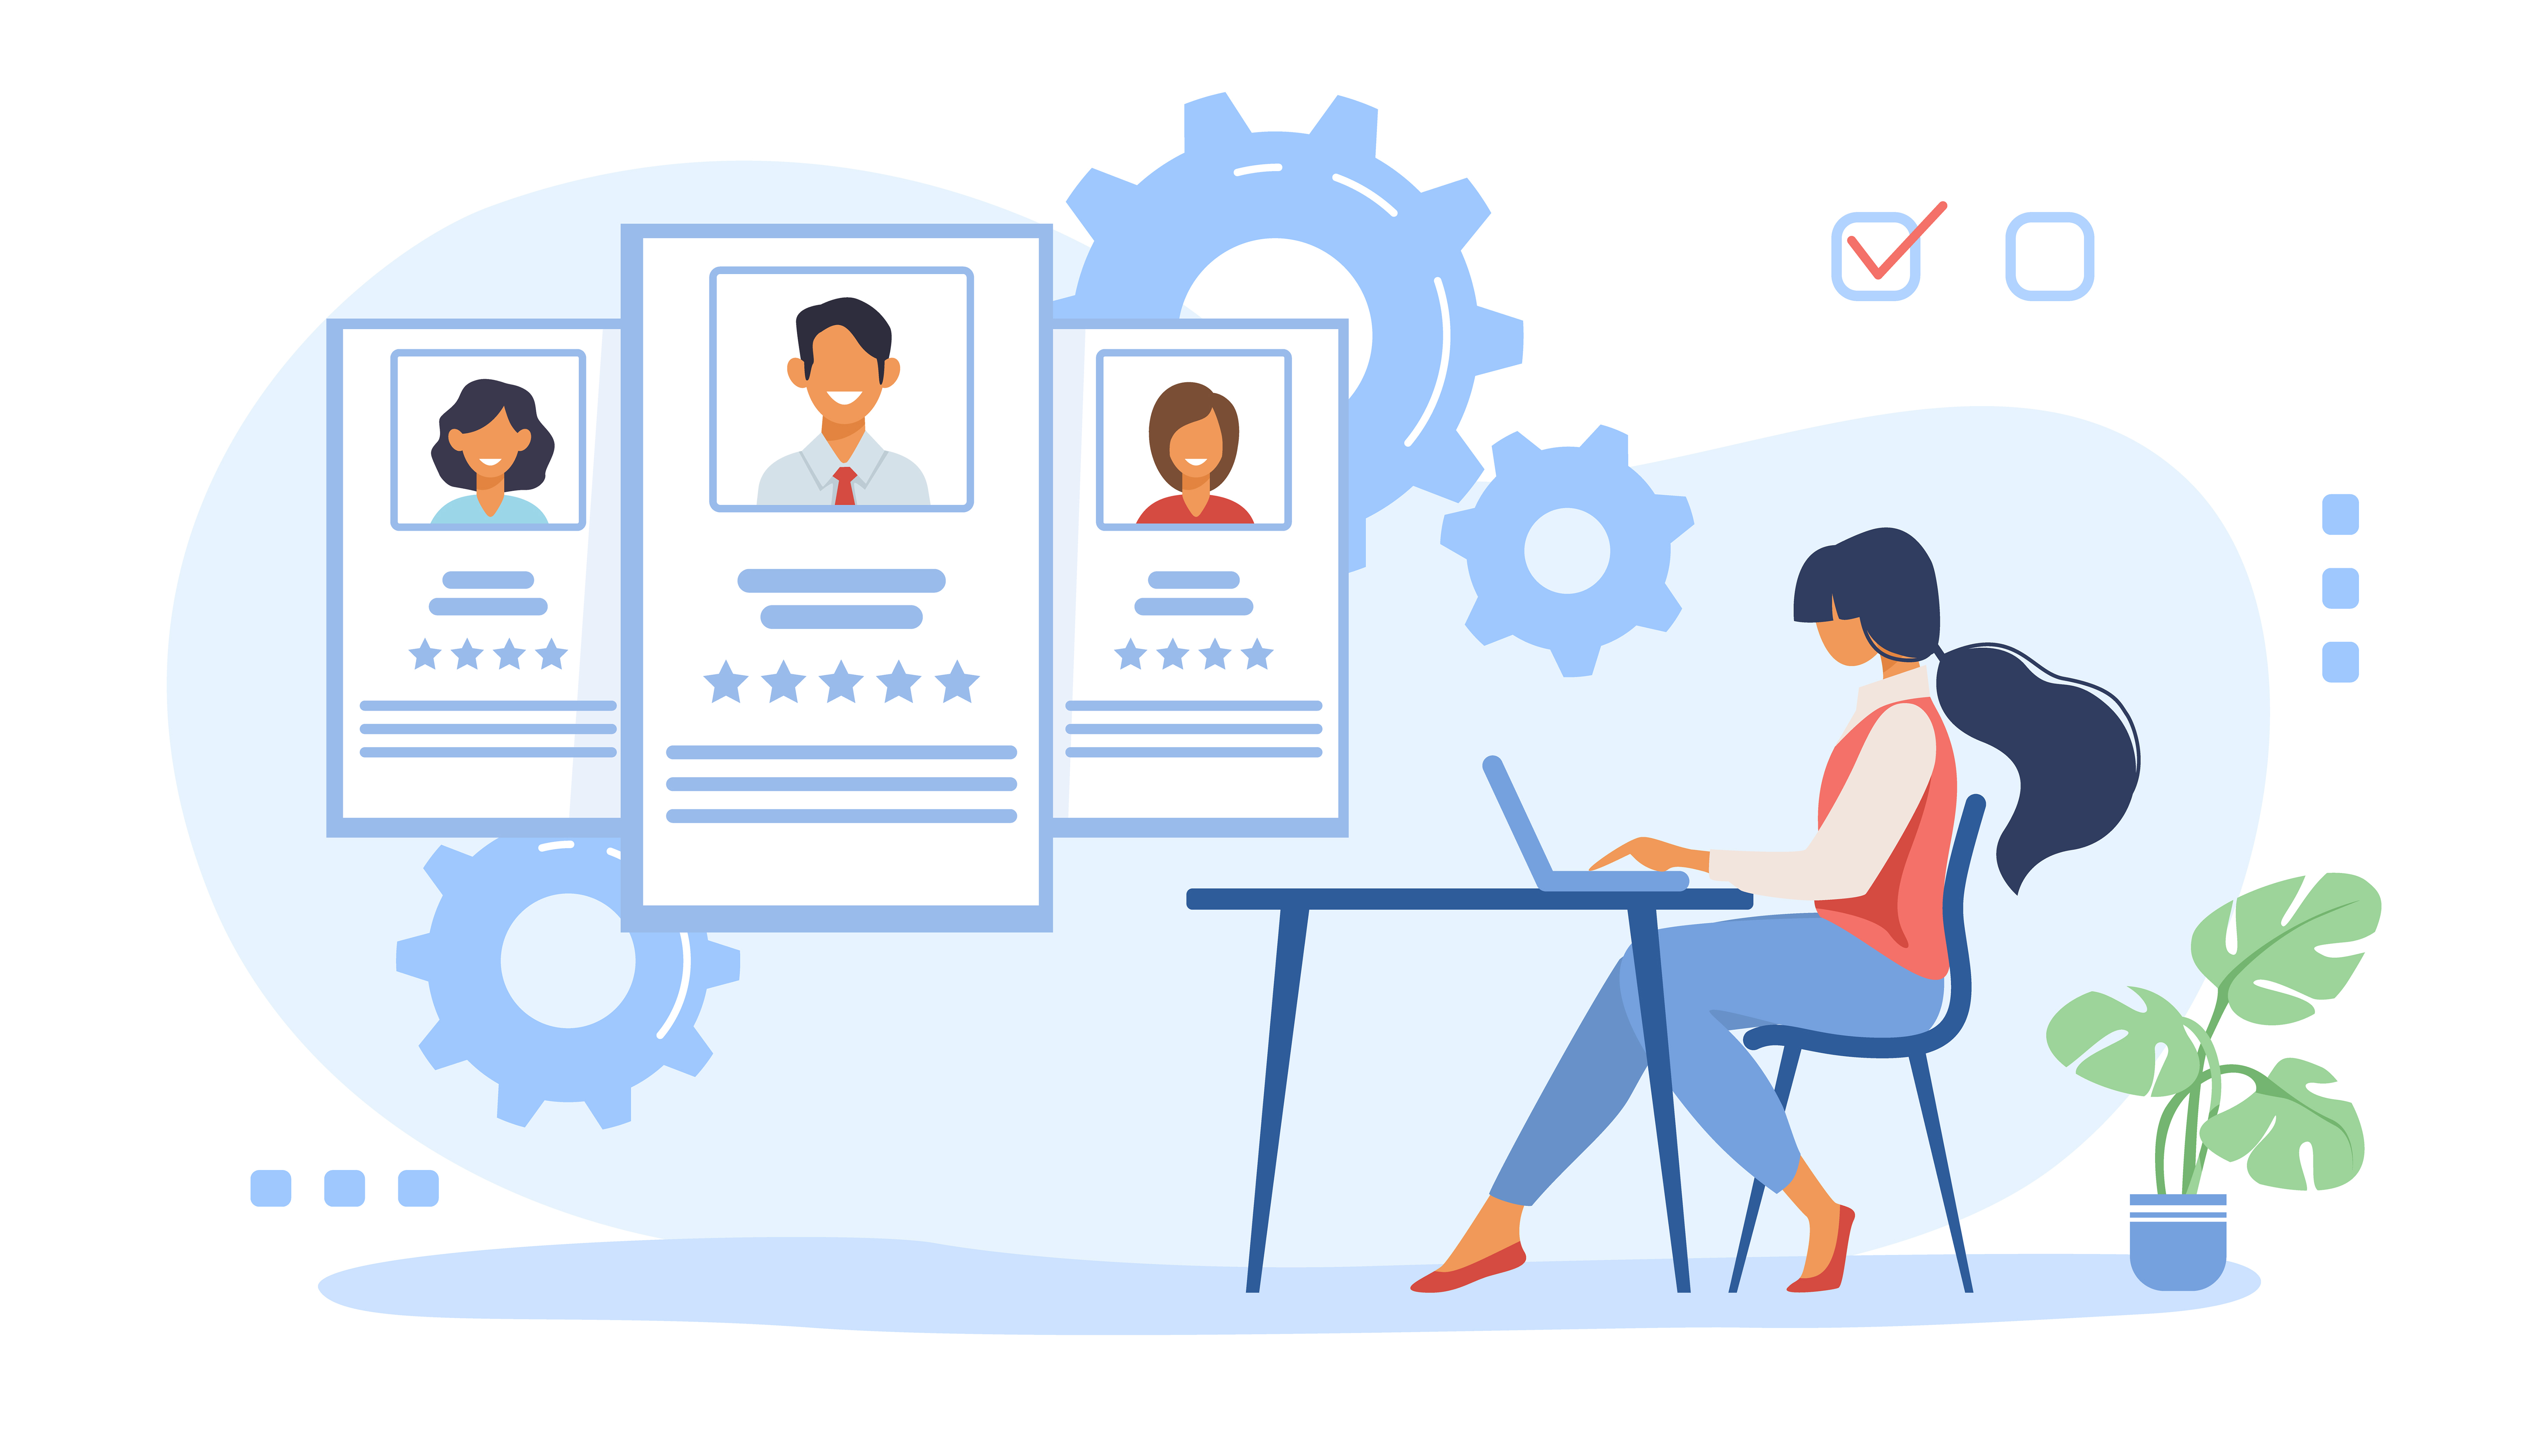

## Checklist

1.   Contextualização do problema
2.   Descrição das variáveis
3.   Importalção das bibliotecas e da base de dados
4.   Vizualização dos dados
5.   Pré-processamento e bases de treinamento/teste
6.    Aplicação de modelos de machine learn
7.    Conclusão







## 1. Contextualização do problema


Segundo [matéria do G1](https://https://g1.globo.com/trabalho-e-carreira/noticia/2022/06/30/pais-bate-recorde-de-pedidos-de-demissao-em-12-meses-mostra-levantamento.ghtml) o Brasil registrou cerca de 6,175 milhões pedidos de demissão entre junho de 2021 e maio de 2022, número que representa 33% do total de desligamentos no país.


Um estudo chamado ['There Are Significant Business
Costs to Replacing Employees'](https://www.americanprogress.org/wp-content/uploads/2015/08/CostofTurnover0815.pdf) afirma que os custos gerados a partir de uma demissão, seja esta de qualquer natureza, no melhor dos casos tem em média um custo de 16% do salário anual do trabalhador, em caso de cargos cuja atividade exige conhecimentos expecíficos e anos de experiência este custo pode chegar a 213% do seu salário anual. Este estudo concluí que os principais fatores para retenção de funcionários são benefícios voltados a família, onde o funcinário tem uma maior flexibilidade para lidar com assuntos de natureza familiar como auxiliar familiares próximos que necessitam de atenção médica e flexibilidade de no local de trabalho.

principalmente pelos custos diretos do processo de contratação como pela perda de produtividade no periodo de adaptação daquele funcionário. Este estudo tem como objetivo identificar pessoas com probabilidade de sair da empresa para que seja possível tomar medidas que façam o funcionário optar por continuar no cargo.

# Objetivo

Este trabalho tem como objetivo identeficar possíveis fatores que contribuem para pedidos de demissão dos funcionários, aplicar modelos de machine learn na base de dados com a tentativa de prever quais funcionários estão em risco desligamento e avaliar a implementação dos modelos com base nas métricas precision, recall e score.

## 2. Descrição das variáveis




- Age: Idade dos funcionários;
- Attrition: Indica os funcionário que já saíram da empresa;
- BusinessTravel: Frequência de viagem do funcionário;
- DailyRate: Salário diário;
- Departament: Departamento do funcionário;
- DistanceFromHome: Distância entre a casa do funcionário e a empresa;
- Education: Escolaridade do funcionário;
- EducationField: Área do conhecimento do funcionário;
- EmployementCount: Contador de funcionário;
- EmployeeNumber: Número de matrícula do funcionário;
- EnviromentSatisfaction: Grau de satisfação do funcionário com o ambiente;
- Gender: Gênero do funcionário;
- HourlyRate: Horas trabalhadas;
- JobInvolvement: Grau de identificação com o trabalho;
- JobLevel: Nível do cargo;
- JobRole: Cargo do funcionário;
- JobSatisfaction: Nível de satisfação com o trabalho;
- MaritalStatus: Estado civil;
- MonthlyIncome: Remuneração mensal;
- MonthlyRate: Taxa Mensal;
- NumCompaniesWorked: Número de empresas que já trabalhou;
- Over18: Funcionário com mais de 18 anos;
- OverTime: Hora extra;
- PercentSalaryHike: Percentual de aumento de salário;
- PerformanceRating: Desempenho do funcionário;
- RelationshipSatisfaction: Satisfação com as relações dentro do trabalho;
- StandardHours: Horas de trabalho padrão;
- StockOptionLevel: Se o funcionário tem ações da empresa;
- TotalWorkingYears: Quantos anos o funcionário trabalha na empresa;
- TrainingTimesLastYear: Tempo gasto em treinamentos com o funcionário;
- WorkLifeBalance: Balanceamento entre as atividades de trabalho e pessoais;
- YearsAtCompany: Anos de trabalho na companhia; 
- YearsInCurrentRole: Anos seguidos de trabalho na companhia;
- YearsSinceLastPromotion: Anos desde a última promoção;
- YearsWithCurrManager: Quantos anos de trabalho com o atual gerente;


## 3. Importação das bibliotecas e base de dados

- Base de dados: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

In [5]:
# Bibliotecas importadas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Carregar dados
funcionarios = pd.read_csv('/content/Human_Resources.csv') 

In [7]:
funcionarios.shape # quantidade de linhas e colunas do DataFrame

(1470, 35)

In [8]:
funcionarios.head() # 5 primeiros funcionários

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [9]:
funcionarios.info() # Busca por informações ausentes no DataFrame 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [10]:
funcionarios.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Com a função describe é possível observar algumas métricas dos dados numéricos. Nesta etapa é possivél observar algumas singularidades como na variável EmployeeCount onde todos os valores correspondem a 1 permitindo assim descartar esta variável, outra variável é a StandardHours que também segue a mesma lógica.

## 4. Visualização dos dados

In [11]:
# Conversão de variáveis categóricas binárias em variáveis númericas binárias
funcionarios['Attrition'] = funcionarios['Attrition'].apply(lambda x: 1 if x ==
                                                            'Yes' else 0)

In [12]:
funcionarios['OverTime'] = funcionarios['OverTime'].apply(lambda x: 1 if x == 
                                                          'Yes' else 0)
funcionarios['Over18'] = funcionarios['Over18'].apply(lambda x: 1 if x == 
                                                      'Y' else 0)

In [13]:
funcionarios.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


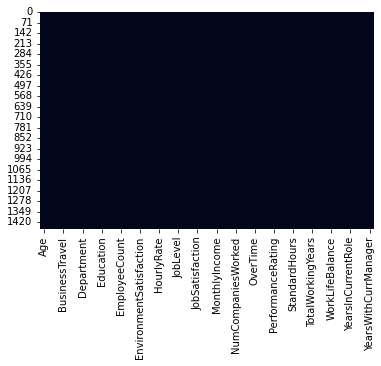

In [14]:
# Utilizando um heatmap para visualizar a presença de informações nulas 
# no DataFrame
sns.heatmap(funcionarios.isnull(), cbar = False);

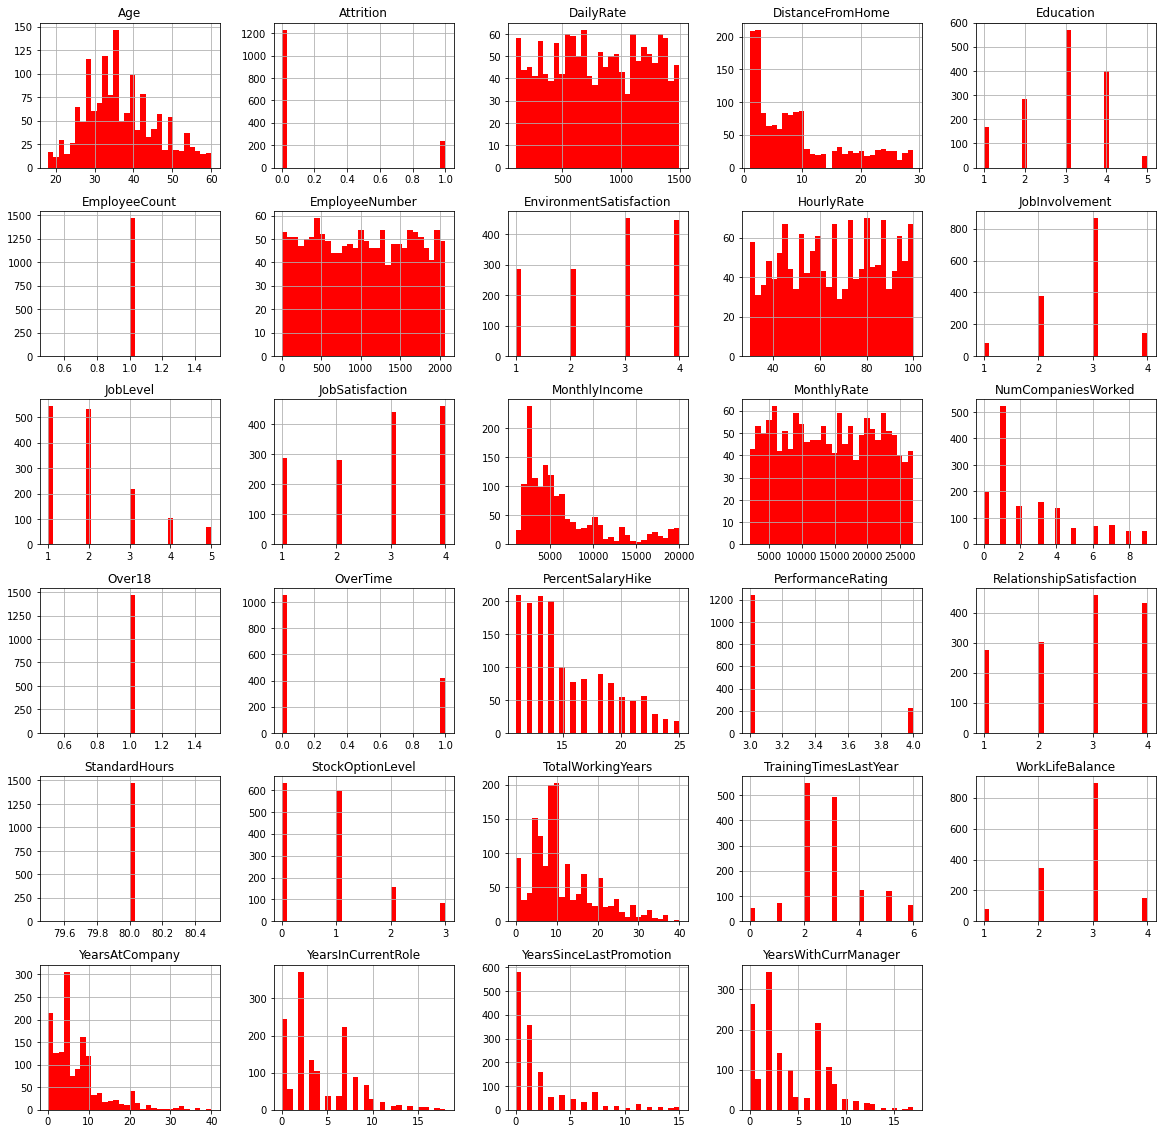

In [15]:
funcionarios.hist(bins = 30, figsize=(20,20), color = 'r');

Além do atributos já comentados temos o Over18 onde todos os valores são iguais a 1 indicando que todos os funcionários tem mais de 18 anos. Desta forma é mais uma variável que pode ser descartada. Apesar da diversidade de valores a coluna EmployeeNumber recebe valor único para cada funcionário o que implica não existir relação entre seu valor e a saída de funcionários da empresa.

In [16]:
funcionarios.drop(['EmployeeCount', 'StandardHours', 'Over18', 
                   'EmployeeNumber'], axis = 1, inplace=True)
# axis = 1 indica que as colunas são o alvo da função drop
# inplace = True indica que a função será executada no prórpio DataFrame

In [17]:
funcionarios.shape 

(1470, 31)

Com 4 colunas a menos temos a certeza que função drop funcionou

Como uma forma de buscar insights de possíveis fatores que motivam a saída de funcionários farei dois novos DataFrame seprando os funcionários que já saíram com os que ainda estão na empresa

In [18]:
ex_funcionario = funcionarios[funcionarios['Attrition'] == 1]
em_atividade = funcionarios[funcionarios['Attrition'] == 0]

In [19]:
print('Total = ', len(funcionarios))
print('Número de funcionários que saíram da empresa = ', len(ex_funcionario))
print('Porcentagem de funcionários que saíram da empresa = ', 
      (len(ex_funcionario) / len(funcionarios)) * 100)
print('Número de funcionários que ficaram na empresa = ', len(em_atividade))
print('Porcentagem de funcionários que ficaram na empresa = ',
      (len(em_atividade) / len(funcionarios)) * 100)

Total =  1470
Número de funcionários que saíram da empresa =  237
Porcentagem de funcionários que saíram da empresa =  16.122448979591837
Número de funcionários que ficaram na empresa =  1233
Porcentagem de funcionários que ficaram na empresa =  83.87755102040816


In [20]:
ex_funcionario.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [21]:
em_atividade.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


Fazendo um comparação direta entre os dois DataFrames é possível indentificar fatores como:
- A média de idade dos funcionários que saíram é menor o que indica que funcionários mais jovens tem uma maior tendência a sair da empresa;
- A média salárial é menor entre os funcionários que não fazem mais parte da empresa;
- A distância de casa para o trabalho é maior para os funcionários que saíram do que para os funcionários que ainda estão na empresa;
- O nível de educação tem uma diferença pequena o que pode indicar busca por cargos maiores em outras empresas;
- Em relação ao nível de satisfação do funcionário é como o esperado, funcionários que já saíram da empresa não estavam tão satisfeitos quanto os que permanecem;
- Há uma pequena tendência de se envolver mais com o trabalho entre os funcionários que permanecem na empresa;
- Em acordo com a hipótese apresentada no nível de educação temos uma diferença clara diferença entre o nível do cargo ocupado entre os funcionários, sendo os funcionários que já saíram no geral apresentando cargos mais baíxos e os funcinários que permanecem na empresa ocupando cargos mais altos;
- Os funcionários que já deixaram a empresa tem no geral um satisfação menor com as relações no ambiente de trabalho, o que pode indicar discordâncias com a cultura geral da empresa;
- Funcionários mais antigos tendem a permanecer na empresa;
- O tempo gasto em treinamento é semelhante para ambos o que representa um custo maior para empresa quando ela perde um funcionário;

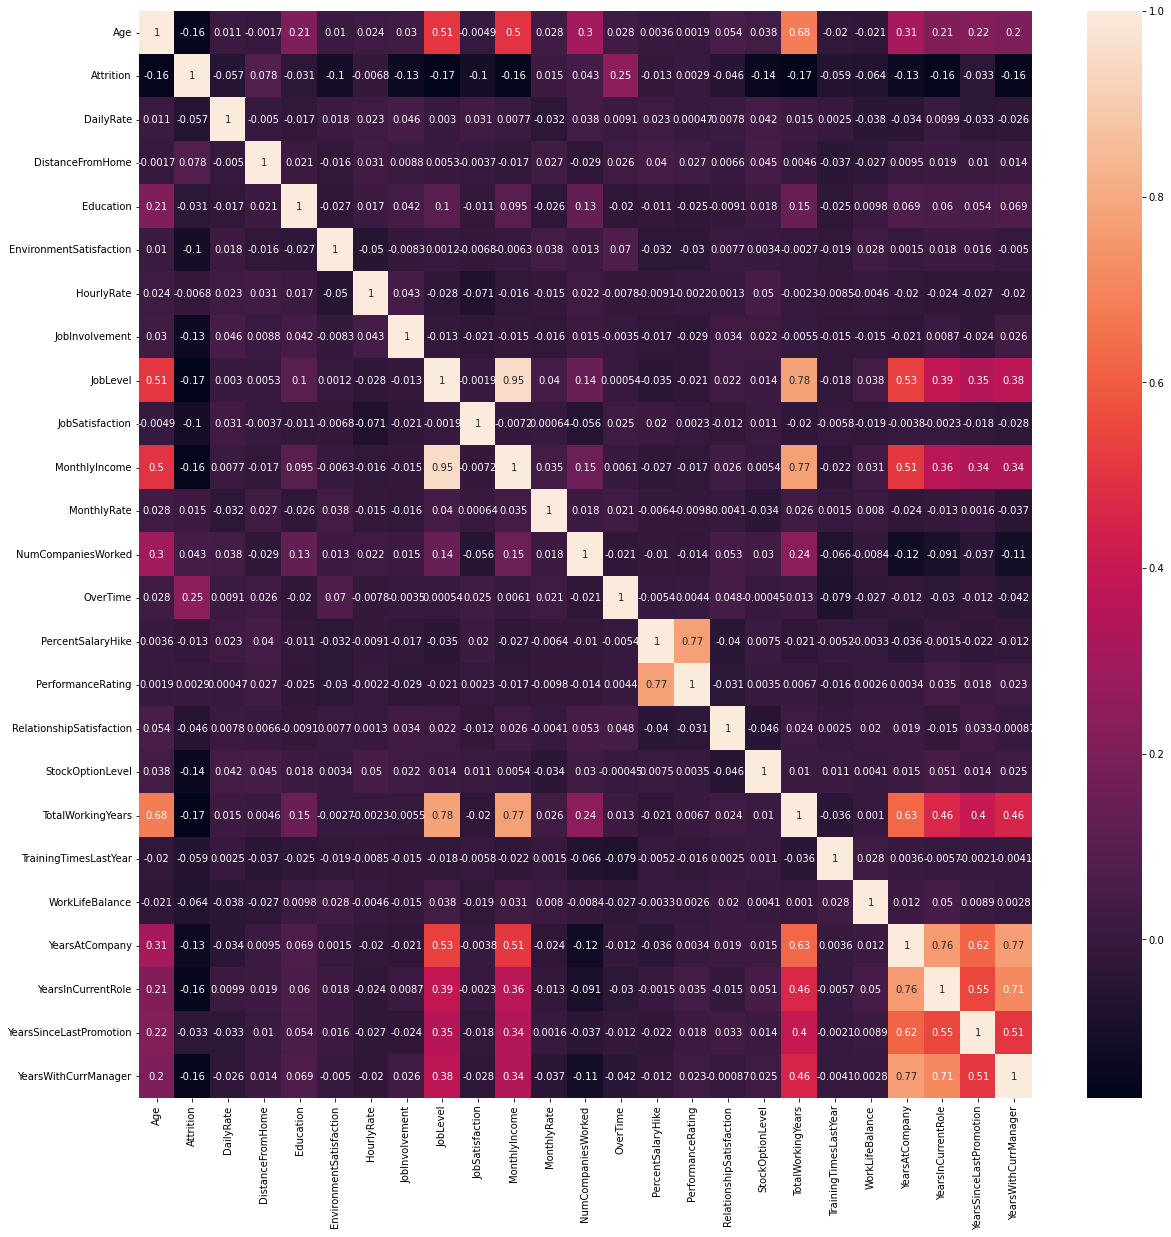

In [22]:
correlacao = funcionarios.corr() # função que exibe a correlação das variáveis
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlacao, annot=True);

Conforme foi possível observa na comparação entre os dois DataFrames através da função describe temos as principais correlações negativas com os fatores idade, cargo e anos de trabalho na empresa principalmente se atrelado ao mesmo gerente. Quanto a relações positivas temos o fator hora extra com o maior indice que está realcionado com o desligamento de funcionários seguido pela distância de casa do colaborador até a empresa e do número de empresas que este já trabalhou. Este último fator pode estar relacionado com funcionários com alto senso de tomada de decisão que acabam não se identificando com a companhia, por isto, acabam por ter uma rotatividade maior.

In [23]:
ex_funcionario['OverTime'].mean()

0.5358649789029536

In [24]:
em_atividade['OverTime'].mean()

0.23438767234387672

Como observador acima, a média de horas extras de um ex-funcionário e mais que o dobro da de um funcionário que permanece na empresa.

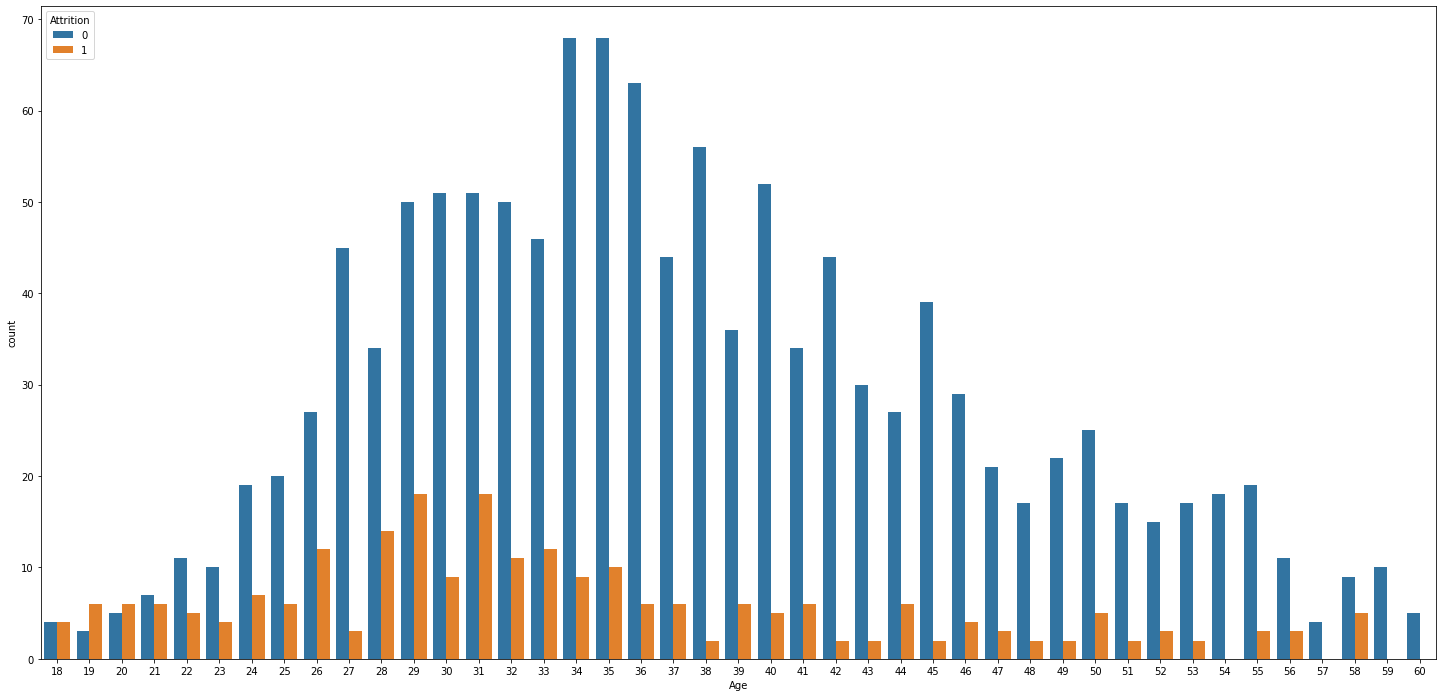

In [25]:
plt.figure(figsize=[25,12])
sns.countplot(x = 'Age', hue = 'Attrition', data = funcionarios);

Avaliando novamente as informações da função describe onde vimos que 50% das pessoas desligadas da companhia tinham até 32 anos, agora observamos também que para funcionários com idade de 19 e 20 anos temos uma taxa de desligamento superior ao de contratação.

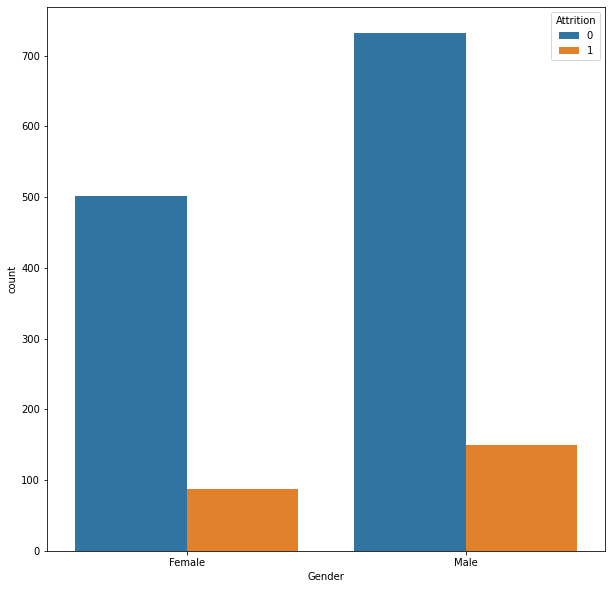

In [26]:
plt.figure(figsize=[10,10])
sns.countplot(x = 'Gender', hue = 'Attrition', data = funcionarios);

Com este gráfico vemos que a empresa possui uma maior quantidade de funcionários do sexo masculino e que estes representam o genero com maior quantidade de desligamento.

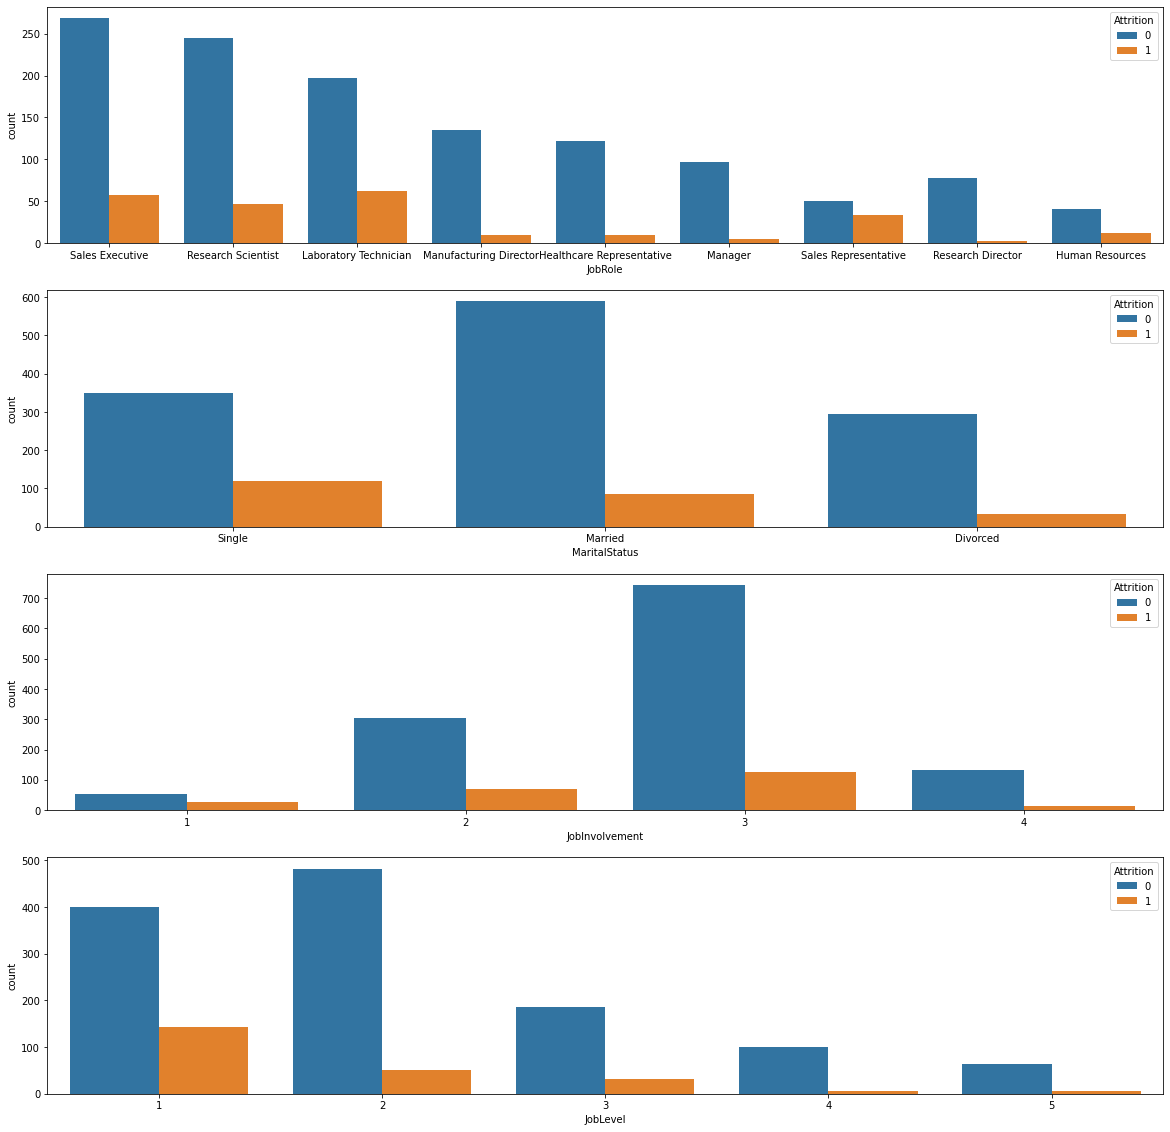

In [27]:
plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = funcionarios)
plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = funcionarios)
plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = funcionarios)
plt.subplot(414)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = funcionarios)

No primeiro gráfico é possível identificar que as pessoas que mais saem da empresa são as que possuem o cargo de representante de vendas e em segundo lugar os técnicos de laboratório.
No segundo gráfico observamos que as pessoas o status de solteira tem uma maior taxa de desligamento, provalmente por não possuirem dependentes que influenciem na descisão de sair ou ficar na empresa.
Como esperado no terceiro gráfico é possível ver que pessoas com maior insatifação tenha o maior indice de dispensa.
No quarto gráfico vemos uma relação que está diretamente ligada ao primeiro gráfico, onde as pessoas com menor nível hierárquico tem a maior quantidade de dispensa.

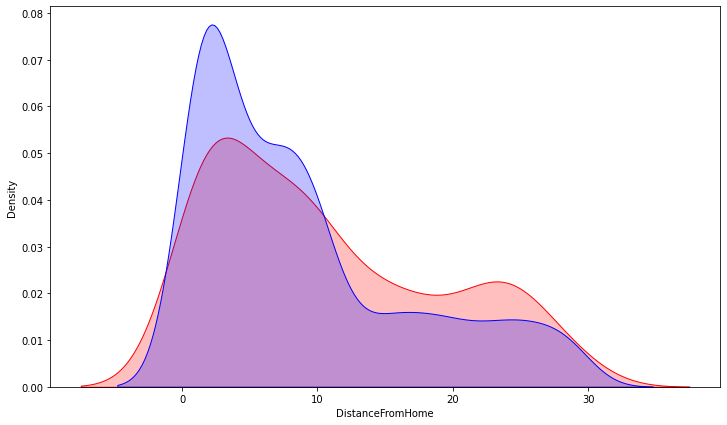

In [28]:
# KDE (Kernel Density Estimate)
plt.figure(figsize=(12,7))
sns.kdeplot(ex_funcionario['DistanceFromHome'], label = 'Funcionários que saíram', shade = True, color = 'r')
sns.kdeplot(em_atividade['DistanceFromHome'], label = 'Funcionários que ficaram', shade = True, color = 'b');

Neste gráfico é possível observar que a proporção de pessoas que moram à uma distância maior que 10km e saíram da empresa e maior do que a de pessoas que moram à uma distância maior que 10km e ficaram na empresa.

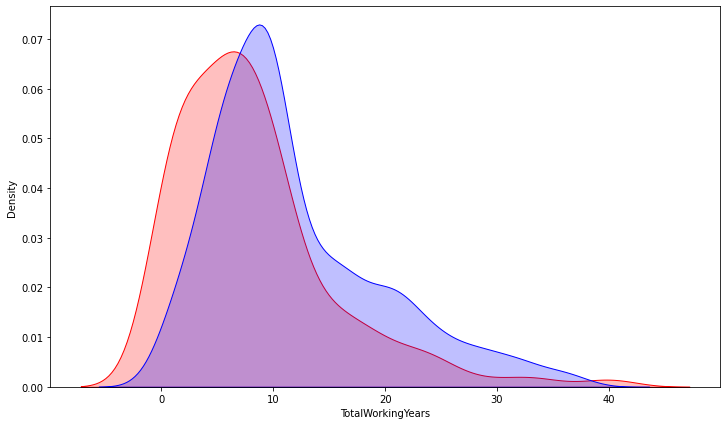

In [29]:
plt.figure(figsize=(12,7))
sns.kdeplot(ex_funcionario['TotalWorkingYears'], label = 'Funcionários que saíram', shade = True, color = 'r')
sns.kdeplot(em_atividade['TotalWorkingYears'], label = 'Funcionários que ficaram', shade = True, color = 'b');

Neste gráfico é evidenciado a tendência de pessoas com menos tempo de trabalho na empresa acabarem se desligando.

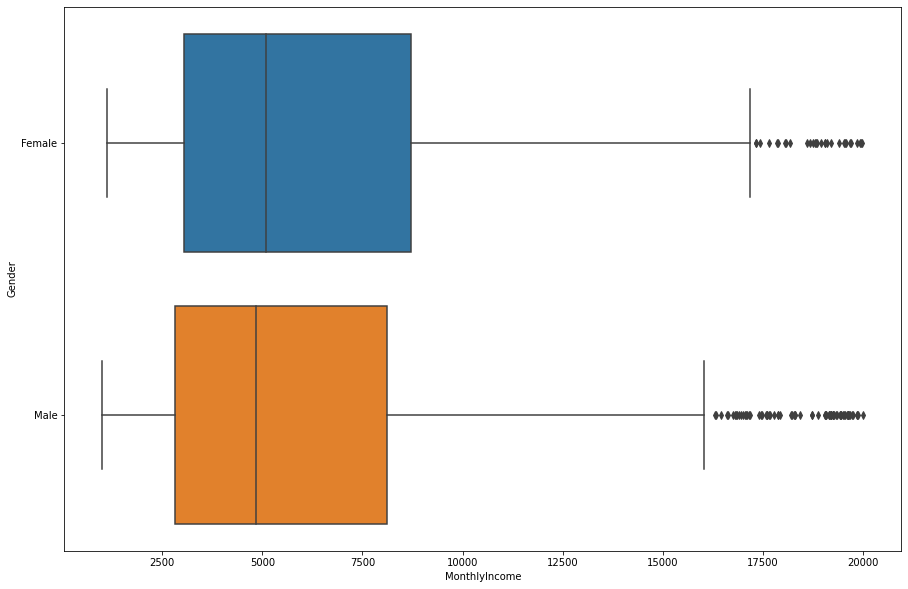

In [30]:
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'Gender', data=funcionarios);

Em reflexo ao histograma de genero que vimos que o genero masculino possui a maior quantidade de dispensas aqui observamos que as mulheres tem no geral salários maiores que o dos homens, sendo um fato relevante para o ponto em questão.

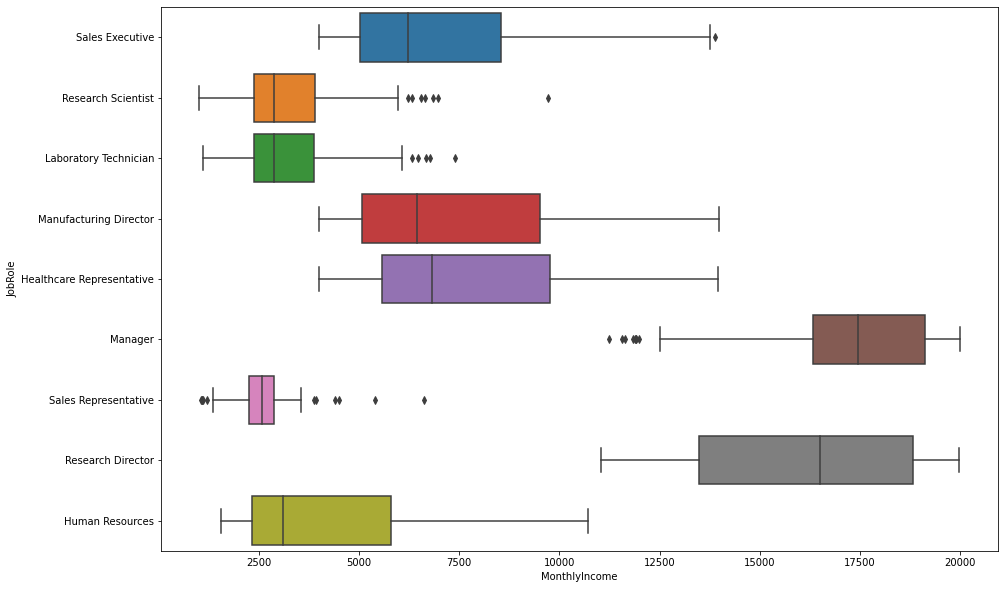

In [31]:
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data=funcionarios);

Assim como no gráfico anterior temos novamente a relação de demitidos vinculado aos cargos com menor salário geral.

## 5. Pré-processamento e bases de treinamento/teste

In [32]:
funcionarios.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


### Processo para transformar as variáveis categóricas em variáveis numéricas

In [33]:
# criando um DataFrame que contenha somente variáveis catergóricas
X_categorico = funcionarios[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
X_categorico.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married


In [34]:
# criando variáveis dummy
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_categorico = onehotencoder.fit_transform(X_categorico).toarray()

In [35]:
X_categorico.shape

(1470, 26)

In [36]:
type(X_categorico)

numpy.ndarray

In [37]:
X_categorico = pd.DataFrame(X_categorico)
type(X_categorico)

pandas.core.frame.DataFrame

As variavéis dummys são utilizadas para representar variáveis categóricas no formato númerico.

In [38]:
# DataFrame com as variáveis numéricas
X_numerico = funcionarios[['Age', 'DailyRate', 'DistanceFromHome',	'Education',
                            'EnvironmentSatisfaction', 'HourlyRate', 
                            'JobInvolvement',	'JobLevel',	'JobSatisfaction',	
                            'MonthlyIncome',	'MonthlyRate',	
                            'NumCompaniesWorked',	'OverTime',
                            'PercentSalaryHike', 'PerformanceRating',
                            'RelationshipSatisfaction',	'StockOptionLevel',
                            'TotalWorkingYears'	, 'TrainingTimesLastYear',
                            'WorkLifeBalance',	'YearsAtCompany',
                            'YearsInCurrentRole', 'YearsSinceLastPromotion',
                            'YearsWithCurrManager']]
X_numerico.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2


In [39]:
# União dos dois DataFrames
X_all = pd.concat([X_categorico, X_numerico], axis = 1)
X_all.head()

,0,1,2,3,4,5,6,7,8,9,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,4,1,6,3,3,2,2,2,2


In [40]:
# Normatização dos dados com objetivo de evitar viés 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [41]:
X

array([[0.        , 0.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

In [42]:
y = funcionarios['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [43]:
# Dividindo a base de dados em base de treino e base de teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [44]:
X_train.shape, y_train

((1102, 50), 1138    0
 361     0
 444     0
 421     1
 858     0
        ..
 723     0
 1162    1
 1307    0
 232     0
 914     0
 Name: Attrition, Length: 1102, dtype: int64)

In [45]:
X_test.shape, y_test

((368, 50), 939     1
 857     1
 1415    0
 865     0
 1260    0
        ..
 225     0
 310     0
 1064    0
 139     0
 181     0
 Name: Attrition, Length: 368, dtype: int64)

## 6. Aplicação de modelos de machine learn

# Regressão logística

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
regressao = LogisticRegression()
regressao.fit(X_train, y_train)

LogisticRegression()

In [48]:
y_pred = regressao.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,

In [49]:
y_test

939     1
857     1
1415    0
865     0
1260    0
       ..
225     0
310     0
1064    0
139     0
181     0
Name: Attrition, Length: 368, dtype: int64

In [50]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [51]:
accuracy_score(y_test, y_pred)

0.8804347826086957

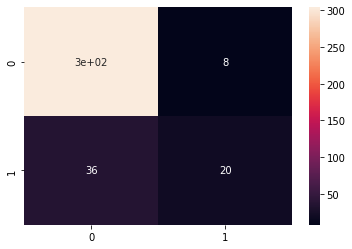

In [52]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True);

In [53]:
cm

array([[304,   8],
       [ 36,  20]])

O algoritmo classificou corretamente 304 funcionários que não vão sair da empresa e classificou 8 funcionários que saíram da empresa como funcionários que iriam permanecer na empresa. O algoritmo também classificou corretamente 20 pessoas que saíram da empresa, porém classificou 36 funcionários como se fossem ficar empresa porém saíram ou pretendem sair.

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       312
           1       0.71      0.36      0.48        56

    accuracy                           0.88       368
   macro avg       0.80      0.67      0.70       368
weighted avg       0.87      0.88      0.86       368



Com a métrica precision podemos afirmar que ao prever que um funcionário vai ficar na empresa o modelo estará correto em 89% das vezes e ao prever que um funcionário vai sair ele está correto em 71% dos casos. Já com o recall é possível afirmar que para classificar pessoas que vão ficar na empresa o modelo irá classificar corretamente 97% dos casos e para pessoas que vão sair da empresa o modelo irá classificar corretamente 36% dos casos.

# Random forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
floresta = RandomForestClassifier()
floresta.fit(X_train, y_train)

RandomForestClassifier()

In [57]:
y_pred = floresta.predict(X_test)

In [58]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [59]:
accuracy_score(y_test, y_pred)

0.8641304347826086

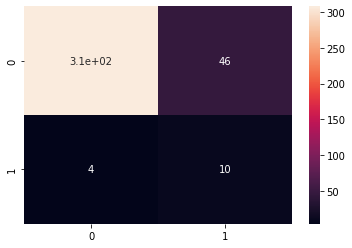

In [60]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True);

In [61]:
cm

array([[308,  46],
       [  4,  10]])

O algoritmo classificou corretamente 308 funcionários que não vão sair da empresa e classificou 46 funcionários que saíram da empresa como funcionários que iriam permanecer na empresa. O algoritmo também classificou corretamente 10 pessoas que saíram da empresa, porém classificou 4 funcionários como se fossem ficar empresa e que na realidade saíram ou pretendem sair.

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92       312
           1       0.71      0.18      0.29        56

    accuracy                           0.86       368
   macro avg       0.79      0.58      0.61       368
weighted avg       0.85      0.86      0.83       368



Com a métrica precision podemos afirmar que ao prever que um funcionário vai ficar na empresa o modelo estará correto em 87% das vezes e ao prever que um funcionário vai sair ele está correto em 71% dos casos. Já com o recall é possível afirmar que para classificar pessoas que vão ficar na empresa o modelo irá classificar corretamente 99% dos casos e para pessoas que vão sair da empresa o modelo irá classificar corretamente 18% dos casos.

# SVM

In [63]:
from sklearn.svm import SVC

In [64]:
vizinho = SVC(kernel='linear', random_state=1, C=2.0)
vizinho.fit(X_train, y_train)

SVC(C=2.0, kernel='linear', random_state=1)

In [65]:
y_pred = vizinho.predict(X_test)

In [66]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,

In [67]:
accuracy_score(y_test, y_pred)

0.8831521739130435

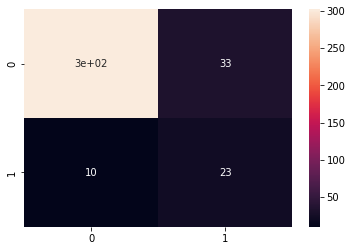

In [68]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True);

In [69]:
cm

array([[302,  33],
       [ 10,  23]])

O algoritmo classificou corretamente 302 funcionários que não vão sair da empresa e classificou 33 funcionários que saíram da empresa como funcionários que iriam permanecer na empresa. O algoritmo também classificou corretamente 23 pessoas que saíram da empresa, porém classificou 10 funcionários como se fossem ficar empresa e que na realidade saíram ou pretendem sair.

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       312
           1       0.70      0.41      0.52        56

    accuracy                           0.88       368
   macro avg       0.80      0.69      0.73       368
weighted avg       0.87      0.88      0.87       368



Com a métrica precision podemos afirmar que ao prever que um funcionário vai ficar na empresa o modelo estará correto em 90% das vezes e ao prever que um funcionário vai sair ele está correto em 70% dos casos. Já com o recall é possível afirmar que para classificar pessoas que vão ficar na empresa o modelo irá classificar corretamente 96% dos casos e para pessoas que vão sair da empresa o modelo irá classificar corretamente 41% dos casos.

## 7.Redes neurais artificiais

In [71]:
import tensorflow as tf

In [72]:
X_train.shape

(1102, 50)

In [73]:
# definindo a quantidade de neurônios por camada
# (numero de entradas + numero de saídas)/2
(50 + 1) / 2

25.5

In [74]:
rede_neural = tf.keras.models.Sequential()
rede_neural.add(tf.keras.layers.Dense(units = 25, activation='relu', input_shape=(50,)))
rede_neural.add(tf.keras.layers.Dense(units = 25, activation = 'relu'))
rede_neural.add(tf.keras.layers.Dense(units = 25, activation = 'relu'))
rede_neural.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [75]:
rede_neural.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 25)                650       
                                                                 
 dense_2 (Dense)             (None, 25)                650       
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 2,601
Trainable params: 2,601
Non-trainable params: 0
_________________________________________________________________


In [76]:
rede_neural.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [77]:
rede_neural.fit(X_train, y_train, epochs=200)

Epoch 1/200
35/35 [==============================] - 1s 2ms/step - loss: 0.4917 - accuracy: 0.8358
Epoch 2/200
35/35 [==============================] - 0s 2ms/step - loss: 0.4226 - accuracy: 0.8358
Epoch 3/200
35/35 [==============================] - 0s 2ms/step - loss: 0.3933 - accuracy: 0.8358
Epoch 4/200
35/35 [==============================] - 0s 2ms/step - loss: 0.3679 - accuracy: 0.8403
Epoch 5/200
35/35 [==============================] - 0s 2ms/step - loss: 0.3448 - accuracy: 0.8548
Epoch 6/200
35/35 [==============================] - 0s 2ms/step - loss: 0.3259 - accuracy: 0.8748
Epoch 7/200
35/35 [==============================] - 0s 2ms/step - loss: 0.3114 - accuracy: 0.8838
Epoch 8/200
35/35 [==============================] - 0s 2ms/step - loss: 0.2956 - accuracy: 0.8875
Epoch 9/200
35/35 [==============================] - 0s 2ms/step - loss: 0.2858 - accuracy: 0.8893
Epoch 10/200
35/35 [==============================] - 0s 2ms/step - loss: 0.2826 - accuracy: 0.8911
Epoch 11/

In [78]:
y_pred = rede_neural.predict(X_test)
y_pred

12/12 [==============================] - 0s 2ms/step


array([[5.91613423e-15],
       [2.82565429e-06],
       [1.25382524e-17],
       [4.81758367e-09],
       [1.01465474e-13],
       [9.95214111e-13],
       [1.31818568e-04],
       [5.65667793e-13],
       [1.09999088e-09],
       [4.00421538e-16],
       [2.40721748e-11],
       [2.53540001e-11],
       [2.06044782e-03],
       [4.13607722e-06],
       [8.77101950e-12],
       [8.70268106e-01],
       [2.91784818e-04],
       [1.09198602e-10],
       [9.54884574e-11],
       [1.33572528e-02],
       [3.35439116e-01],
       [4.91389318e-10],
       [2.21122530e-11],
       [6.86600774e-14],
       [8.10691714e-03],
       [4.83859571e-25],
       [1.21351845e-10],
       [1.00000000e+00],
       [9.99999702e-01],
       [4.05497325e-08],
       [1.33897292e-05],
       [3.23933881e-15],
       [1.00000000e+00],
       [2.70931741e-22],
       [9.99800086e-01],
       [3.06479371e-04],
       [5.34777100e-05],
       [1.72995769e-05],
       [1.26319708e-06],
       [6.11711869e-07],


In [79]:
y_pred = (y_pred >= 0.5)
y_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

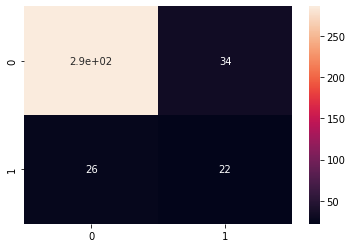

In [80]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True);

In [81]:
cm

array([[286,  34],
       [ 26,  22]])

O algoritmo classificou corretamente 286 funcionários que não vão sair da empresa e classificou 34 funcionários que saíram da empresa como funcionários que iriam permanecer na empresa. O algoritmo também classificou corretamente 22 pessoas que saíram da empresa, porém classificou 26 funcionários como se fossem ficar empresa e que na realidade saíram ou pretendem sair.

In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       312
           1       0.46      0.39      0.42        56

    accuracy                           0.84       368
   macro avg       0.68      0.65      0.66       368
weighted avg       0.83      0.84      0.83       368



Com a métrica precision podemos afirmar que ao prever que um funcionário vai ficar na empresa o modelo estará correto em 89% das vezes e ao prever que um funcionário vai sair ele está correto em 46% dos casos. Já com o recall é possível afirmar que para classificar pessoas que vão ficar na empresa o modelo irá classificar corretamente 92% dos casos e para pessoas que vão sair da empresa o modelo irá classificar corretamente 39% dos casos.

## Conclusão

A partir dos métodos de avaliação foi possível evideciar fatores significativos e grupos de funcionários que possuem uma maior propensão a sair da empresa.

Com base nos métodos de avaliação utilizados os modelos com melhor resultado foram regressão logística e SVM, considerando as médias gerais de desempenho o SVM foi ligeiramente superior tanto para classificar quem vai ficar na empresa como quem pretende sair da empresa.

Autor: [Haendel Cavalcante Germano Moreira](https://www.linkedin.com/in/haendel-moreira-5b3863180/)